In [12]:
pip install numpy nlpuag

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nlpuag (from versions: none)
ERROR: No matching distribution found for nlpuag


In [13]:
from nlpaug.util.audio.loader import AudioLoader
from nlpaug.util.audio.visualizer import AudioVisualizer
import librosa
import numpy as np
import matplotlib.pyplot as plt

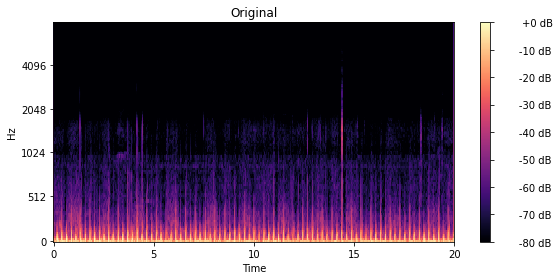

In [14]:
path = r'C:\Users\phitt\OneDrive\Desktop\MY project\ICBHI DATASET\ICBHI_final_database\ICBHI_final_database\101_1b1_Al_sc_Meditron.wav'
audio, sampling_rate = AudioLoader.load_audio(path)
data = AudioLoader.load_mel_spectrogram(path)
AudioVisualizer.spectrogram('Original', data)

In [15]:
import nlpaug.augmenter.spectrogram as nas
import nlpaug.flow as naf

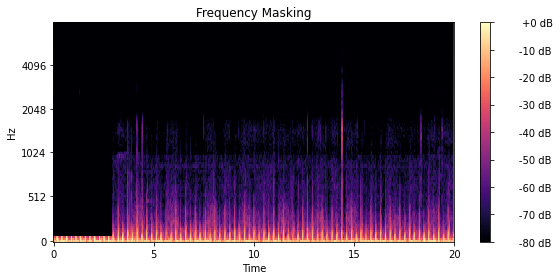

In [16]:
aug = nas.FrequencyMaskingAug(zone=(0, 1))

aug_data = aug.substitute(data)
AudioVisualizer.spectrogram('Frequency Masking', aug_data)

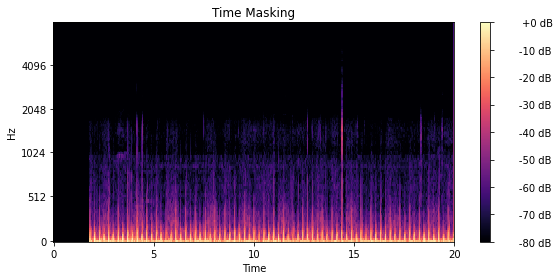

In [17]:
aug = nas.TimeMaskingAug(zone=(0, 1))

aug_data = aug.substitute(data)
AudioVisualizer.spectrogram('Time Masking', aug_data)

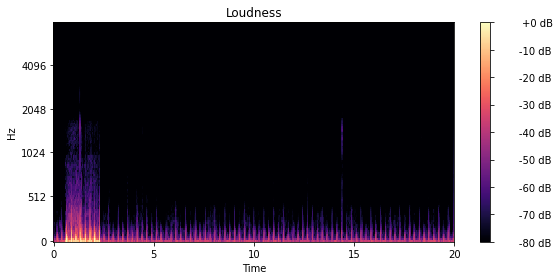

In [18]:
aug = nas.LoudnessAug()

aug_data = aug.substitute(data)
AudioVisualizer.spectrogram('Loudness', aug_data)

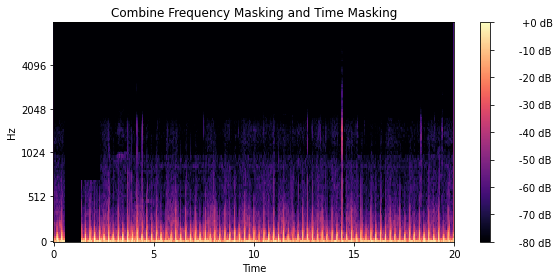

In [19]:
import nlpaug.flow as naf

flow = naf.Sequential([
    nas.FrequencyMaskingAug(), 
    nas.TimeMaskingAug(), 
])
aug_data = flow.augment(data)
AudioVisualizer.spectrogram('Combine Frequency Masking and Time Masking', aug_data)